In [1]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

from copy import deepcopy

%matplotlib inline
sys.path.append(os.path.dirname(os.path.abspath('./')))

In [2]:
f0_path = '/home/lfmp/unicamp/datasci4health-A11/data/raw/AVC/004_FLAIR18.bmp'
f0_mask_path = '/home/lfmp/unicamp/datasci4health-A11/data/raw/AVC/004_FLAIR18_mask.png'

f0_image = np.array(cv2.imread(f0_path, 0))
f0_mask = np.array(cv2.imread(f0_mask_path, cv2.IMREAD_UNCHANGED))
_, f0_mask = cv2.threshold(f0_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
f0_masked = f0_mask * f0_image

Shape: (512, 512)


Text(0.5, 1.0, 'Image masked')

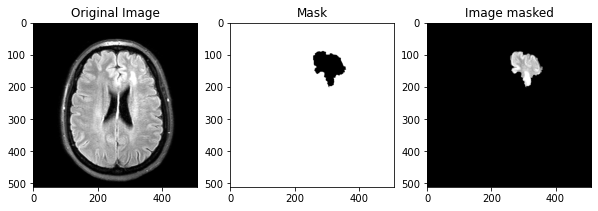

In [3]:
print(f'Shape: {f0_image.shape}')

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 3, 1)
plt.imshow(f0_image, cmap="gray")
plt.title("Original Image")

fig.add_subplot(1, 3, 2)
plt.imshow(~f0_mask, cmap="gray")
plt.title("Mask")

fig.add_subplot(1, 3, 3)
plt.imshow(f0_masked, cmap="gray")
plt.title("Image masked")
plt.

Text(0.5, 1.0, 'Image MedianMAD normalized')

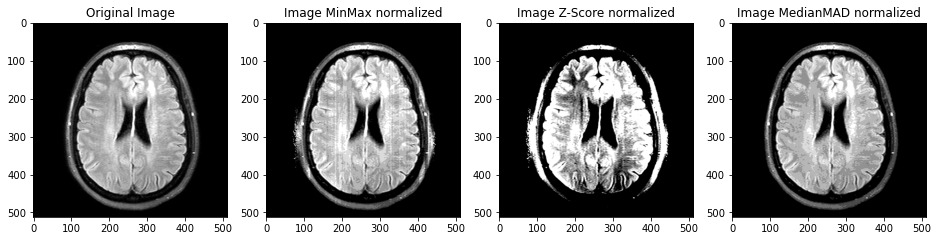

In [4]:
from src.features.build_features import *

img_maxmin, img_zs, img_medianmad = get_normalized_images(f0_image)

fig = plt.figure(figsize=(16, 10))

fig.add_subplot(1, 4, 1)
plt.imshow(f0_image, cmap="gray")
plt.title("Original Image")

fig.add_subplot(1, 4, 2)
plt.imshow(img_maxmin, cmap="gray")
plt.title("Image MinMax normalized")

fig.add_subplot(1, 4, 3)
plt.imshow(img_zs, cmap="gray")
plt.title("Image Z-Score normalized")

fig.add_subplot(1, 4, 4)
plt.imshow(img_medianmad, cmap="gray")
plt.title("Image MedianMAD normalized")

In [5]:
images = {
    'original': deepcopy(f0_image),
    'MinMax': deepcopy(img_maxmin),
    'RobustScaler': deepcopy(img_zs),
    'MedianMAD': deepcopy(img_medianmad)
}
for key,f0 in images.items():
  print(f"{'='*100}")
  print(
      f"{' '*40} GLCM for {key} image"
  )
  print(f"{'='*100}")
  print(GLCM_feature(f0))

                                         GLCM for original image
[[  72.78117356  122.33124107  122.33124107  122.33124107   55.6330877
    72.78117356   55.6330877 ]
 [ 786.31472994  617.51008899  721.85203855  539.25967872  523.95267901
   786.31472994  523.95267901]
 [1631.28895399 1604.47308022 1608.45533441 1404.31556872 1163.28869048
  1631.28895399 1163.28869048]]
                                         GLCM for MinMax image
[[0.1738243  0.23540045 0.23540045 0.23540045 0.13075618 0.1738243
  0.13075618]
 [1.03253414 0.82672676 0.92767899 0.71344043 0.65889518 1.03253414
  0.65889518]
 [1.98578559 1.91693303 1.88621913 1.62920402 1.30635386 1.98578559
  1.30635386]]
                                         GLCM for RobustScaler image
[[0.39073202 0.53098755 0.53098755 0.53098755 0.26658818 0.39073202
  0.26658818]
 [2.25364481 1.81142571 1.94705131 1.51199199 1.30895516 2.25364481
  1.30895516]
 [3.91448878 3.6938723  3.50690528 2.92200826 2.27184865 3.91448878
  2.27184865]]
 

In [6]:
images = {
    'original': deepcopy(f0_image),
    'MinMax': deepcopy(img_maxmin),
    'RobustScaler': deepcopy(img_zs),
    'MedianMAD': deepcopy(img_medianmad)
}
for key, f0 in images.items():
  print(f"{'='*100}")
  print(f"{' '*40} GLRLM for {key} image")
  print(f"{'='*100}")
  print(GLRLM_feature(f0))

                                         GLRLM for original image
{'Short Run Emphasis (SRE)': 0.337, 'Long Run Emphasis (LRE)': 49236.702, 'Grey Level Uniformity (GLU)': 44399.154, 'Run Length Uniformity (RLU)': 353.84, 'Run Percentage (RPC)': 16.549}
                                         GLRLM for MinMax image
{'Short Run Emphasis (SRE)': 0.006, 'Long Run Emphasis (LRE)': 699221.834, 'Grey Level Uniformity (GLU)': 262998.168, 'Run Length Uniformity (RLU)': 1027.998, 'Run Percentage (RPC)': 2.998}
                                         GLRLM for RobustScaler image
{'Short Run Emphasis (SRE)': 0.006, 'Long Run Emphasis (LRE)': 699221.834, 'Grey Level Uniformity (GLU)': 262998.168, 'Run Length Uniformity (RLU)': 1027.998, 'Run Percentage (RPC)': 2.998}
                                         GLRLM for MedianMAD image
{'Short Run Emphasis (SRE)': 0.006, 'Long Run Emphasis (LRE)': 699221.834, 'Grey Level Uniformity (GLU)': 262998.168, 'Run Length Uniformity (RLU)': 1027.998, 'Run Pe

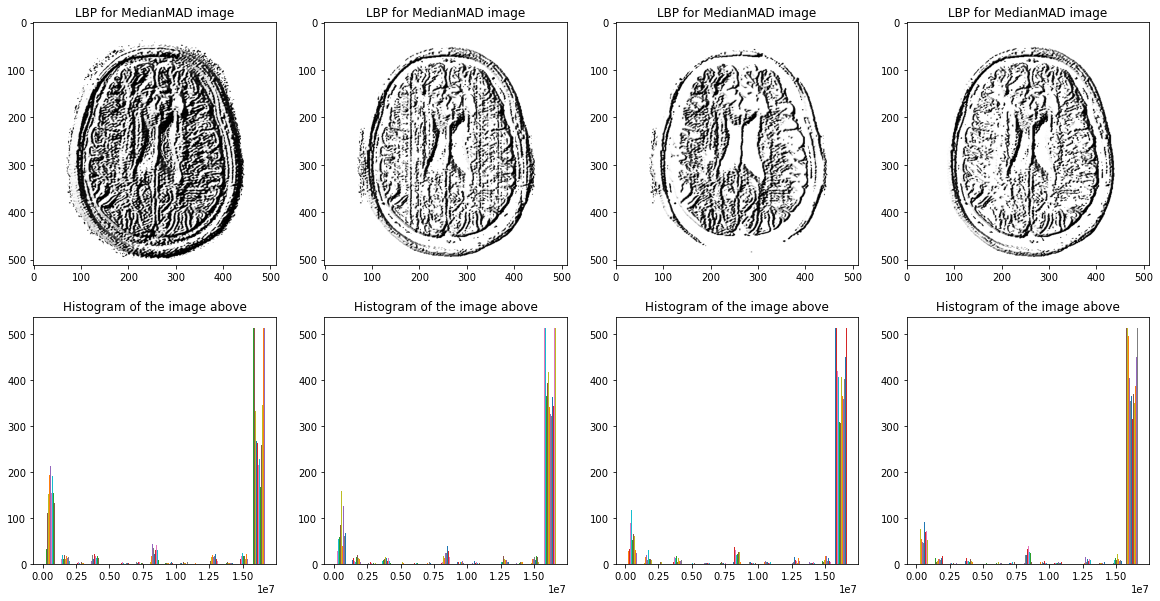

In [7]:
images = {
    'original': deepcopy(f0_image),
    'MinMax': deepcopy(img_maxmin),
    'RobustScaler': deepcopy(img_zs),
    'MedianMAD': deepcopy(img_medianmad)
}
fig = plt.figure(figsize=(20, 10))

lbps = []
for key, f0 in images.items():
  lbp, h_image = LBP_image(images[key], r=3)
  lbps.append(lbp)


fig.add_subplot(2, 4, 1)
plt.imshow(lbps[0], cmap="gray")
plt.title(f"LBP for {key} image")

fig.add_subplot(2, 4, 2)
plt.imshow(lbps[1], cmap="gray")
plt.title(f"LBP for {key} image")

fig.add_subplot(2, 4, 3)
plt.imshow(lbps[2], cmap="gray")
plt.title(f"LBP for {key} image")

fig.add_subplot(2, 4, 4)
plt.imshow(lbps[3], cmap="gray")
plt.title(f"LBP for {key} image")

fig.add_subplot(2, 4, 5)
plt.hist(lbps[0], bins=15)
plt.title("Histogram of the image above")

fig.add_subplot(2, 4, 6)
plt.hist(lbps[1], bins=15)
plt.title("Histogram of the image above")

fig.add_subplot(2, 4, 7)
plt.hist(lbps[2], bins=15)
plt.title("Histogram of the image above")

fig.add_subplot(2, 4, 8)
plt.hist(lbps[3], bins=15)
plt.title("Histogram of the image above")
plt.show()


Text(0.5, 1.0, 'Masked Image MedianMAD normalized')

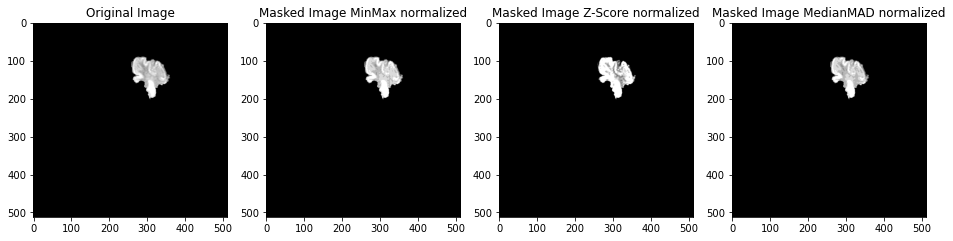

In [8]:
fig = plt.figure(figsize=(16, 10))

fig.add_subplot(1, 4, 1)
plt.imshow(f0_masked, cmap="gray")
plt.title("Original Image")

fig.add_subplot(1, 4, 2)
plt.imshow(img_maxmin * f0_mask, cmap="gray")
plt.title("Masked Image MinMax normalized")

fig.add_subplot(1, 4, 3)
plt.imshow(img_zs*f0_mask, cmap="gray")
plt.title("Masked Image Z-Score normalized")

fig.add_subplot(1, 4, 4)
plt.imshow(img_medianmad*f0_mask, cmap="gray")
plt.title("Masked Image MedianMAD normalized")

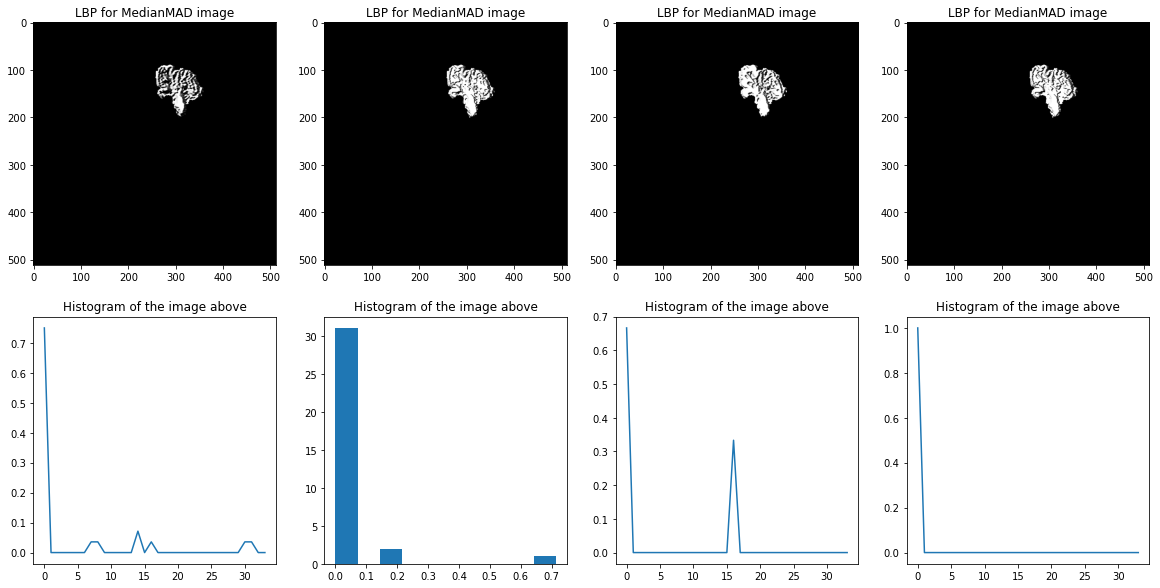

In [9]:
images = {
    'original': deepcopy(f0_image),
    'MinMax': deepcopy(img_maxmin),
    'RobustScaler': deepcopy(img_zs),
    'MedianMAD': deepcopy(img_medianmad)
}
fig = plt.figure(figsize=(20, 10))

lbps = []
h_images = []
for key, f0 in images.items():
  lbp, h_image = get_lbp_with_mask_feature(images[key], mask=f0_mask, R=2, P=16)
  lbps.append(lbp)
  h_images.append(h_image)

fig.add_subplot(2, 4, 1)
plt.imshow(lbps[0], cmap="gray")
plt.title(f"LBP for {key} image")

fig.add_subplot(2, 4, 2)
plt.imshow(lbps[1], cmap="gray")
plt.title(f"LBP for {key} image")

fig.add_subplot(2, 4, 3)
plt.imshow(lbps[2], cmap="gray")
plt.title(f"LBP for {key} image")

fig.add_subplot(2, 4, 4)
plt.imshow(lbps[3], cmap="gray")
plt.title(f"LBP for {key} image")

fig.add_subplot(2, 4, 5)
plt.plot(h_images[0])
plt.title("Histogram of the image above")

fig.add_subplot(2, 4, 6)
plt.hist(h_images[1])
plt.title("Histogram of the image above")

fig.add_subplot(2, 4, 7)
plt.plot(h_images[2])
plt.title("Histogram of the image above")

fig.add_subplot(2, 4, 8)
plt.plot(h_images[3])
plt.title("Histogram of the image above")
plt.show()